In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_excel('/content/sample_data/ecommerce retail.xlsx')

# Explore Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


1. Có dữ liệu null ở cột CustomerID -> loại bỏ các dòng null
2. Chuyển CustomerID type từ float64 -> object
3. Format InvoiceDate theo dạng Datetime



In [ ]:
copy_df = df.copy()
count_Invoice = copy_df.groupby('Country')['InvoiceNo'].count()
sum_Invoice = count_Invoice.sum()
Invoice_per_country = count_Invoice / sum_Invoice * 100
sort_Invoice_per_country =  Invoice_per_country.sort_values(ascending=False)
sort_Invoice_per_country

,InvoiceNo
Country,
United Kingdom,91.431956
Germany,1.752139
France,1.579047
EIRE,1.512431
Spain,0.467422
Netherlands,0.437527
Belgium,0.381798
Switzerland,0.369435
Portugal,0.280305


Từ bảng trên cho thấy, 91,43% đơn hàng đến từ UK -> Chỉ nên xem xét R-F-M score ở UK

# Clean Data

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('object')
df = df.dropna(subset=['CustomerID'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df = df[df['InvoiceNo'] != 'C']
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice']>0]
df = df[df['Country'] == "United Kingdom"]

In [ ]:
df['date'] = df['InvoiceDate'].dt.date
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01


# R-F-M score


In [ ]:
reference_date = df['date'].max()
df['Price'] = df['Quantity'] * df['UnitPrice']
rfm_df = df.groupby('CustomerID').agg({
    'date': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Price': 'sum'  # Monetary
}).reset_index()
rfm_df.columns = ['CustomerID','Recency', 'Frequency', 'Monetary']
rfm_df['CustomerID'] = rfm_df['CustomerID'].astype('object')
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   object 
 1   Recency     3920 non-null   int64  
 2   Frequency   3920 non-null   int64  
 3   Monetary    3920 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 122.6+ KB


# Segment

In [ ]:
rfm_df['R_Rank'] = rfm_df['Recency'].rank(method = 'first',ascending=True).astype(int)
rfm_df['F_Rank'] = rfm_df['Frequency'].rank(method = 'first',ascending=False).astype(int)
rfm_df['M_Rank'] = rfm_df['Monetary'].rank(method = 'first',ascending=False).astype(int)

In [ ]:
rfm_df['R_bins'] = pd.qcut(rfm_df['R_Rank'],q=5,labels=[1,2,3,4,5])
rfm_df['F_bins'] = pd.qcut(rfm_df['F_Rank'],q=5,labels=[1,2,3,4,5])
rfm_df['M_bins'] = pd.qcut(rfm_df['M_Rank'],q=5,labels=[1,2,3,4,5])
print(rfm_df)

     CustomerID  Recency  Frequency  Monetary  R_Rank  F_Rank  M_Rank R_bins  \
0       12346.0      325          1  77183.60    3777    3851       6      5   
1       12747.0        2        103   4196.01     127     937     284      1   
2       12748.0        0       4595  33719.73       1       3      24      1   
3       12749.0        3        199   4090.88     209     411     299      1   
4       12820.0        3         59    942.34     210    1533    1511      1   
...         ...      ...        ...       ...     ...     ...     ...    ...   
3915    18280.0      277         10    180.60    3616    3367    3389      5   
3916    18281.0      180          7     80.82    3147    3568    3820      5   
3917    18282.0        7         12    178.05     485    3233    3405      1   
3918    18283.0        3        756   2094.88     292      27     720      1   
3919    18287.0       42         70   1837.28    1800    1359     842      3   

     F_bins M_bins  
0         5      1

In [ ]:
rfm_df['R'] = rfm_df['R_bins'].astype('str')
rfm_df['F'] = rfm_df['F_bins'].astype('str')
rfm_df['M'] = rfm_df['M_bins'].astype('str')
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']
rfm_df['RFM_Score'] = rfm_df['RFM_Score'].astype('int')
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  3920 non-null   object  
 1   Recency     3920 non-null   int64   
 2   Frequency   3920 non-null   int64   
 3   Monetary    3920 non-null   float64 
 4   R_Rank      3920 non-null   int64   
 5   F_Rank      3920 non-null   int64   
 6   M_Rank      3920 non-null   int64   
 7   R_bins      3920 non-null   category
 8   F_bins      3920 non-null   category
 9   M_bins      3920 non-null   category
 10  R           3920 non-null   object  
 11  F           3920 non-null   object  
 12  M           3920 non-null   object  
 13  RFM_Score   3920 non-null   int64   
dtypes: category(3), float64(1), int64(6), object(4)
memory usage: 349.1+ KB


In [ ]:
seg = pd.read_excel('/content/sample_data/ecommerce retail.xlsx', sheet_name='Segmentation')
seg.head()

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [ ]:
seg['RFM Score'] = seg['RFM Score'].str.split(',')
seg = seg.explode('RFM Score').reset_index(drop = True)
seg['RFM Score'] = seg['RFM Score'].astype('int')
seg.head()

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [ ]:
joined = pd.DataFrame()
joined = pd.merge(rfm_df,seg, how = 'left', left_on = 'RFM_Score', right_on = 'RFM Score')
joined.head()

,CustomerID,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank,R_bins,F_bins,M_bins,R,F,M,RFM_Score,Segment,RFM Score
0,12346.0,325,1,77183.60,3777,3851,6,5,5,1,5,5,1,551,Potential Loyalist,551
1,12747.0,2,103,4196.01,127,937,284,1,2,1,1,2,1,121,Lost customers,121
2,12748.0,0,4595,33719.73,1,3,24,1,1,1,1,1,1,111,Lost customers,111
3,12749.0,3,199,4090.88,209,411,299,1,1,1,1,1,1,111,Lost customers,111
4,12820.0,3,59,942.34,210,1533,1511,1,2,2,1,2,2,122,Hibernating customers,122


# Visualize

     CustomerID  Recency  Frequency  Monetary  R_Rank  F_Rank  M_Rank R_bins  \
0       12346.0      325          1  77183.60    3777    3851       6      5   
1       12747.0        2        103   4196.01     127     937     284      1   
2       12748.0        0       4595  33719.73       1       3      24      1   
3       12749.0        3        199   4090.88     209     411     299      1   
4       12820.0        3         59    942.34     210    1533    1511      1   
...         ...      ...        ...       ...     ...     ...     ...    ...   
3915    18280.0      277         10    180.60    3616    3367    3389      5   
3916    18281.0      180          7     80.82    3147    3568    3820      5   
3917    18282.0        7         12    178.05     485    3233    3405      1   
3918    18283.0        3        756   2094.88     292      27     720      1   
3919    18287.0       42         70   1837.28    1800    1359     842      3   

     F_bins M_bins  R  F  M  RFM_Score 

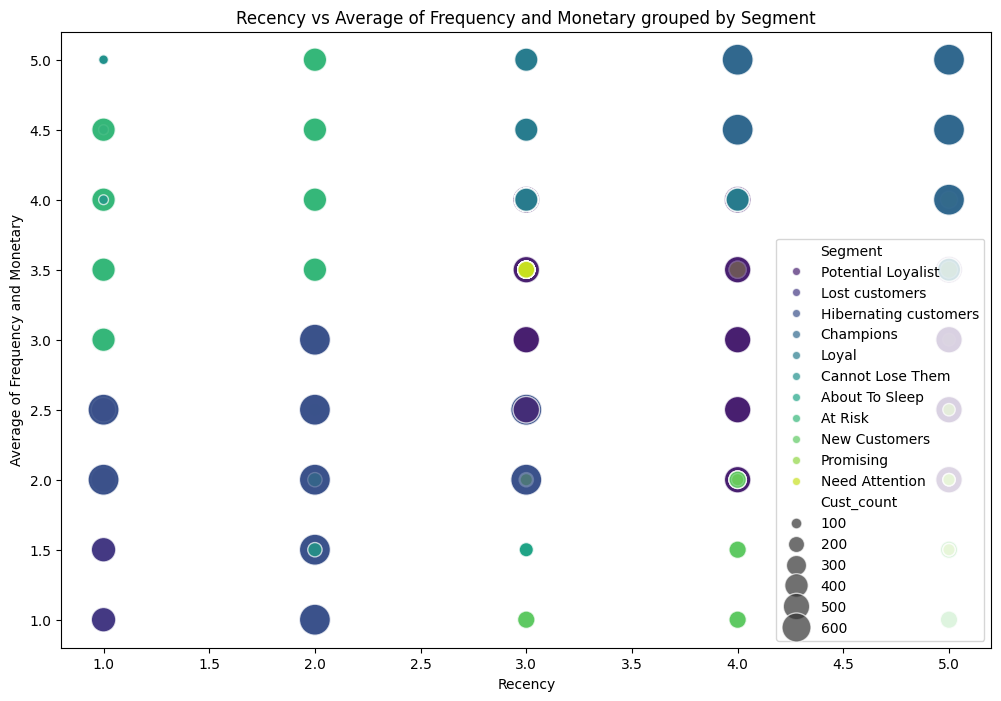

In [ ]:
joined['R'] = joined['R'].astype('int')
joined['F'] = joined['F'].astype('int')
joined['M'] = joined['M'].astype('int')
joined['Cust_count'] = joined.groupby('Segment')['CustomerID'].transform('count')
joined['Average_FM'] = joined[['F', 'M']].mean(axis=1)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='R', y='Average_FM', hue='Segment', size = 'Cust_count', data=joined, alpha=0.7, palette='viridis', sizes=(50, 500))
plt.title('Recency vs Average of Frequency and Monetary grouped by Segment')
plt.xlabel('Recency')
plt.ylabel('Average of Frequency and Monetary')

print(joined)

<ipython-input-17-a43a857f5223>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


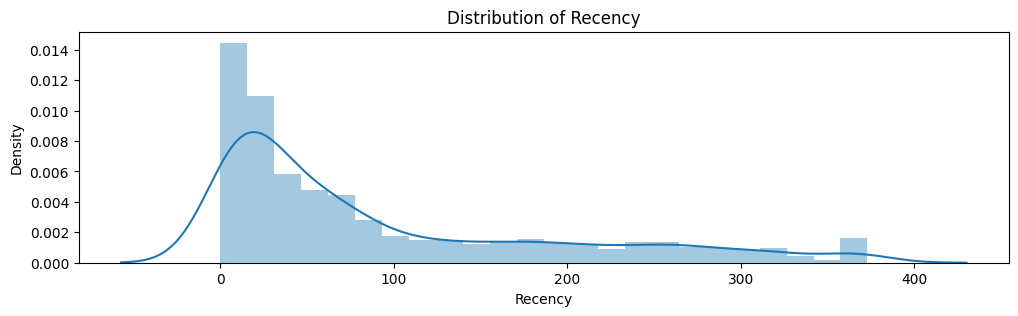

<ipython-input-17-a43a857f5223>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


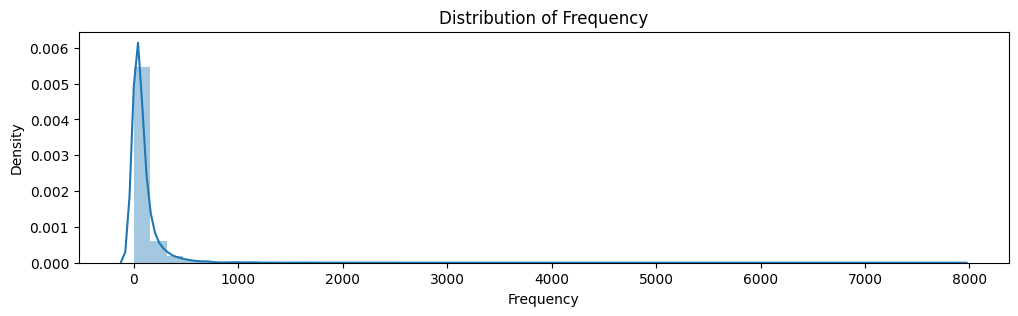

<ipython-input-17-a43a857f5223>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


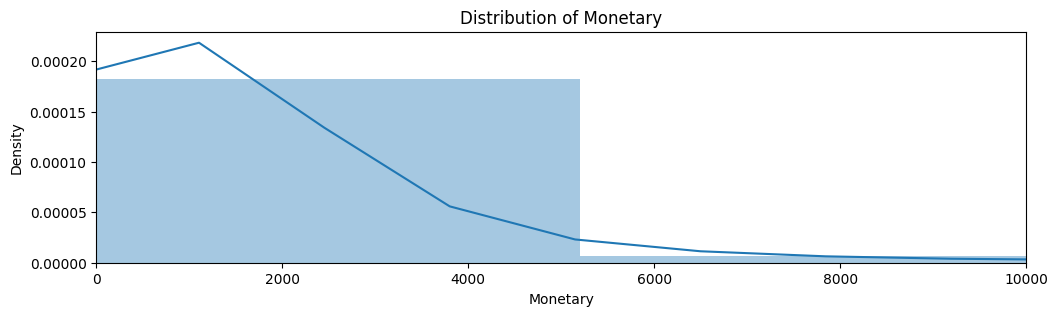

In [ ]:
colnames = ['Recency','Frequency','Monetary']

for col in colnames:
  fig,ax = plt.subplots(figsize=(12,3))
  sns.distplot(joined[col])
  ax.set_title('Distribution of %s' %col)
  if joined[col].max() > 10000:
        ax.set_xlim(0, 10000)
  plt.show()

In [ ]:
Cust_count = joined.groupby('Segment').agg({
    'CustomerID': 'count',
    'Monetary': 'sum'}).reset_index()
Cust_count.columns = ['Segment','Customers', 'Total_Sales']
Cust_count.head()

,Segment,Customers,Total_Sales
0,About To Sleep,161,447323.010
1,At Risk,401,184229.840
2,Cannot Lose Them,86,29967.140
3,Champions,682,142342.770
4,Hibernating customers,684,1294084.311


In [ ]:
fig = px.treemap(joined,
                 path=['Segment'],
                 values='CustomerID',
                 color='R',
                 color_continuous_scale='Viridis',
                 hover_data={'R': True, 'Average_FM': True},
                 title='Treemap of Segments with Recency and Average of Frequency and Monetary')


fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title_text='Treemap of Segments with Recency and Average of Frequency and Monetary',
    title_x=0.5
)
fig.show()